# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

**Before starting with this lab, here is a quick reminder about our [Rules for hand-in assignments](https://www.ida.liu.se/~TDDE16/exam.en.shtml#handins) and the [Policy on cheating and plagiarism](https://www.ida.liu.se/~TDDE16/exam.en.shtml#cheating).**

In [1]:
# requires
import pandas as pd
import bz2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm




## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [2]:
with bz2.open('speeches-201718.json.bz2') as source:
    speeches_201718 = pd.read_json(source)

with bz2.open('speeches-201819.json.bz2') as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [3]:
speeches_201718.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [4]:
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [5]:
parties = sorted(training_data['party'].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by producing a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. Write code to generate two bar plots that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

Text(0.5, 1.02, 'Count of Speeches over different parties (in training data)')

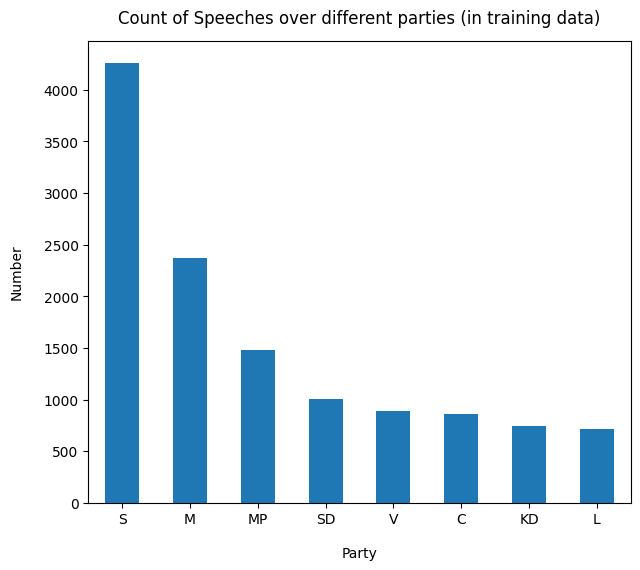

In [6]:
# training data
training_data['party'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0);

plt.xlabel("Party", labelpad=14)
plt.ylabel("Number", labelpad=14)
plt.title("Count of Speeches over different parties (in training data)", y=1.02)

Text(0.5, 1.02, 'Count of Speeches over different parties (in test data)')

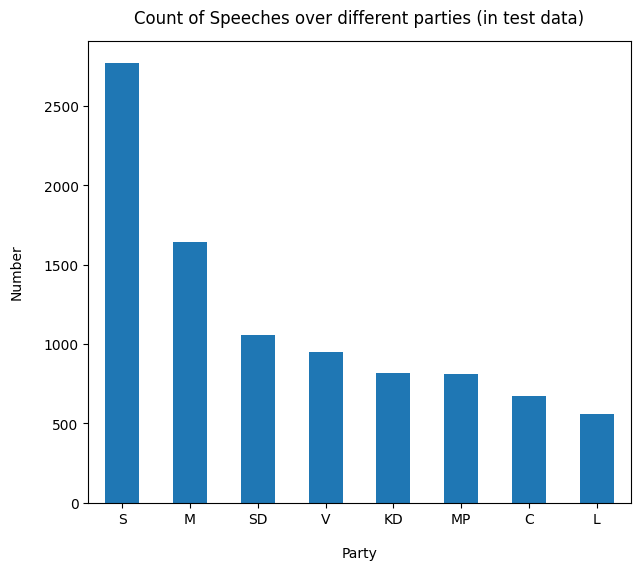

In [7]:
# test data
test_data['party'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)

plt.xlabel("Party", labelpad=14)
plt.ylabel("Number", labelpad=14)
plt.title("Count of Speeches over different parties (in test data)", y=1.02)


*TODO: Enter your summary here*
The Swedish Social Democratic Party(S) held the most of the speeches over two data frame.
The second one is Moderate Party(M).
The latter parties delivered a number of speeches that differed from the first two parties(S and M), and some of them showed some ups and downs in the number of speeches.

Comparing the final results with the speeches in 2014 and 2018, we can see that: the S and M parties delivered the most speeches and they ended up with the most seats, there is a positive correlation, and the rest of the parties roughly fit this pattern.

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

In [8]:
# split data
X_1, y_1 = training_data['words'], training_data['party']
X_2, y_2 = test_data['words'], test_data['party']

# map each words record to a countVectorizer
pipe = Pipeline([('vect', CountVectorizer()), ('model', MultinomialNB())])

# Fit the model
model = pipe.fit(X_1, y_1)

# Eva
y_true = y_2
y_pred = model.predict(X_2)
print(classification_report(y_true, y_pred, zero_division = 0))# return 0 when there is a zero division




              precision    recall  f1-score   support

           C       0.63      0.04      0.07       671
          KD       0.70      0.02      0.03       821
           L       0.92      0.02      0.04       560
           M       0.36      0.68      0.47      1644
          MP       0.36      0.25      0.29       809
           S       0.46      0.84      0.59      2773
          SD       0.57      0.12      0.20      1060
           V       0.59      0.15      0.24       950

    accuracy                           0.43      9288
   macro avg       0.57      0.26      0.24      9288
weighted avg       0.52      0.43      0.34      9288



Would you have expected the results that you got?

For these 8 classes(parties), the results are not what we expected. For example, the precision of M and S are 0.5 and 0.3 respectively, which are too low. and the other classes return 0 precision.

## Problem 3: Baselines

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline is a classifier that generates predictions by random sampling, respecting the training set&rsquo;s class distribution. This baseline is implemented by the class [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). What is the performance of the random baseline on the test data?

In [9]:
# TODO: Write code here to evaluate the random baseline

dummy_clf = DummyClassifier(strategy="uniform")
# dummy_clf = DummyClassifier(strategy="stratified")

dummy_clf.fit(X_1, y_1)
dummy_clf.predict(X_2)
dummy_clf.score(X_2, y_2)


0.12338501291989665

An even dumber baseline is to predict, for every document, that class which appears most often in the training data. This baseline is also called the most frequent class baseline. What is the accuracy of that baseline on the test data?

In [10]:
# TODO: Write code here to print the accuracy of the most frequent class baseline

dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_1, y_1)
dummy_clf.predict(X_2)
dummy_clf.score(X_2, y_2)


0.298557278208441

DummyClassifier provides two random baseline strategies, stratified and uniform, neither of these methods provide a higher accuracy than the most_frequent method.

## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Summarise your results in a short text.

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [11]:
training_data['party'].value_counts()

S     4261
M     2370
MP    1481
SD    1010
V      894
C      865
KD     743
L      719
Name: party, dtype: int64

In [12]:
len(training_data['party'])

12343

In [13]:
balanced_training_data = training_data[training_data['party'] == 'L']
size = min(training_data['party'].value_counts())

for party in parties:
    if party != 'L':
        sample = training_data[training_data['party'] == party].sample(n = size)
        balanced_training_data = pd.concat([balanced_training_data, sample], axis = 0, ignore_index=True)

In [14]:
balanced_training_data['party'].value_counts()

L     719
C     719
KD    719
M     719
MP    719
S     719
SD    719
V     719
Name: party, dtype: int64

In [15]:
balanced_training_data

,id,words,party
0,H5-003-008,aktuell debatt om situationen för ensamkommand...,L
1,H5-003-016,herr talman jag lyssnar på migrationsministern...,L
2,H5-003-024,aktuell debatt om situationen för ensamkommand...,L
3,H5-004-031,herr talman jag har den senaste tiden haft anl...,L
4,H5-004-040,herr talman tack försvarsministern för det sva...,L
...,...,...,...
5747,H5-101-014,fru talman jag ville självklart ge kristdemokr...,V
5748,H5-004-119,herr talman jag tror att jag och försvarsminis...,V
5749,H5-115-007,fru talman i nästan fyra år har vi drivit en k...,V
5750,H5-131-066,herr talman det märks så väl att jimmie åkesso...,V


In [16]:

# split data
X_1, y_1 = balanced_training_data['words'], balanced_training_data['party']
X_2, y_2 = test_data['words'], test_data['party']

# Fit the model
model = pipe.fit(X_1, y_1)

# Eva
y_true = y_2
y_pred = model.predict(X_2)
print(classification_report(y_true, y_pred, zero_division = 0))# return 0 when there is a zero division




              precision    recall  f1-score   support

           C       0.27      0.46      0.34       671
          KD       0.30      0.40      0.34       821
           L       0.27      0.43      0.33       560
           M       0.41      0.47      0.44      1644
          MP       0.33      0.36      0.35       809
           S       0.81      0.33      0.47      2773
          SD       0.45      0.43      0.44      1060
           V       0.41      0.56      0.47       950

    accuracy                           0.41      9288
   macro avg       0.41      0.43      0.40      9288
weighted avg       0.50      0.41      0.42      9288



*TODO: Enter the summary of your results here*

we can see that in Problem4, when we balanced the training data, the model performs better in terms of Precision and F1 value.


## Problem 5: Confusion matrix

A **confusion matrix** is a specific table that is useful when analysing the performance of a classifier. In this table, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). If you would rather see a visual representation, you can also use [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

Your task is to use the confusion matrix in order to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses with $p$ when it predicts the party of a speaker.

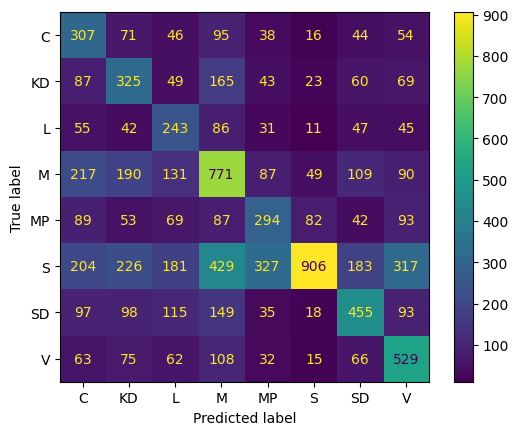

In [17]:
# TODO: Write code here to solve Problem 5

cm = confusion_matrix(y_true, y_pred, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()


Take a minute to reflect on whether your results make sense.

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words (binary) model in addition to the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting bigrams in addition to unigrams (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. Print the results of your best model, along with the parameter values that yielded these results.

In [18]:
# TODO: Write code here to implement the grid search

# default analyzer is "word"
parameter = {'vect__analyzer':('word', 'char', 'char_wb'),
            'vect__ngram_range':[(2, 2), (1, 2), (1,1)],
            'model__alpha':(1, 0.1)}
clf = GridSearchCV(pipe, parameter, cv=5, n_jobs=-1)

In [19]:
clf.fit(X_1, y_1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (1, 0.1),
                         'vect__analyzer': ('word', 'char', 'char_wb'),
                         'vect__ngram_range': [(2, 2), (1, 2), (1, 1)]})

In [20]:
clf.best_params_


{'model__alpha': 0.1, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}

## Problem 7: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model.

In [21]:
# TODO: Write code here to search for a better model and print the results
pipe = Pipeline([('vectorizer', CountVectorizer()), ('SVC',svm.SVC())])

# pipe = Pipeline([('vectorizer', CountVectorizer()), ('model', MultinomialNB())])

# set grid of hyperparameters
parameters = {'vectorizer__analyzer':('word', 'char', 'char_wb'),
            'vectorizer__ngram_range':[(2, 2), (1, 2), (1,1)],
            'SVC__kernel':('linear', 'rbf', 'sigmoid')}
pipe = GridSearchCV(pipe, parameters, cv=3, n_jobs= -1)
# fit on test data
pipe.fit(X_1, y_1)
# print best param
print(pipe.best_params_)

{'SVC__kernel': 'linear', 'vectorizer__analyzer': 'word', 'vectorizer__ngram_range': (1, 2)}


In [22]:
prediction = pipe.predict(X_2)
print(classification_report(y_2, prediction, zero_division = 0))

              precision    recall  f1-score   support

           C       0.24      0.40      0.30       671
          KD       0.27      0.25      0.26       821
           L       0.17      0.33      0.22       560
           M       0.44      0.31      0.36      1644
          MP       0.24      0.46      0.31       809
           S       0.64      0.40      0.49      2773
          SD       0.36      0.37      0.37      1060
           V       0.43      0.34      0.38       950

    accuracy                           0.36      9288
   macro avg       0.35      0.36      0.34      9288
weighted avg       0.42      0.36      0.38      9288



## Reflection questions

The following reflection questions will help you prepare for the diagnostic test. Answer each of them in the form of a short text and put your answers in the cell below. You will get feedback on your answers from your lab assistant.

**RQ 2.1:** Summarise the results of your experiments for Problem&nbsp;2. Are your results ‘good’ or ‘bad’? How do you determine that?

**RQ 2.2:** Summarise the results of your experiments for Problem&nbsp;4. Would you think that your results are typical even for other classification tasks? How would *oversampling* have looked like for this task? When would you use undersampling, when oversampling?

**RQ 2.3:** Which model performed best in your experiments for Problem&nbsp;6? Why is it important to do a hyperparameter search before drawing conclusions about the performance of a model? Why is it often not done, anyway? Why should you never tune hyperparameters on the test set?


*TODO: Enter your answers here*

 **2.1:** 
 
 I would say "bad".

 In the results returned for problem 2, the model seems to have a good prediction when looking at the Precision column, but the value of F1 is low, which is the summed average of Precision and Recall, the higher the value the better. 

The model in Problemm2 lacks credibility, although the prediction accuracy is good for some parties, but the F1 value is too low.

Later on, we can see that in Problem4, when we balanced the training data, the model performs better in terms of Precision and F1 value.

 **2.2:** 

We cannot say the result of Problem 4 is typical even for other classification tasks. 
Balanced data brings better F1 values, but the most important point is that we also need to consider the generalization ability of the model.

Oversampling brings low F1 score.

Undersampling is appropriate when there is enough data for analysis. There is also a case when a class has fewer samples making it more difficult to predict and we can consider undersampling.

When there is an insufficient amount of data it is possible to consider oversampling, replicating or creating new synthetic examples in a small number of classes.



 **2.3:** 
 
 In problem 6, the bag-of-words model with patameters: extracting bigrams and $\alpha$=0.1 performed best. The performance of a model can differ from hyperparameters. Compared to the accuracy in problem 5, the accuracy in problem 6 increased. Hyperparameter search is often not done because it takes times to compare the performance when the model has a lot of hyperparameters. The hyperparameters shouldn't be tuned on test dataset because we use test data to evaluate the performance of the final model, so the test dataset shoulen't be involved in the training step.






**Congratulations on finishing L2! 👍**